# Análise Temporal
## Avaliação do impacto de trocas de gestão nas vendas (2000–2025)

O AlphaClub passou por duas mudanças de gestão ao longo de sua operação. Alterações administrativas podem impactar diretamente o desempenho comercial, eficiência da equipe e estratégia de vendas.

Desejo entender se as mudanças de gestão resultaram em melhoria, estabilidade ou queda no desempenho comercial.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
vendas = pd.read_csv('../data/processed/vendas_tratado.csv')

In [5]:
# Ajeitando o datetime, que não entrou

vendas['Data'] = pd.to_datetime(vendas['Data'], errors='coerce')

In [13]:
# Configurando as cores que serão utilizadas

cores = ["#4F81BD", "#9BBB59", "#C0504D"]

In [6]:
# Criando colunas para utilizar melhor a criação de gráficos.

vendas["Ano"] = vendas["Data"].dt.year
vendas["Mes"] = vendas["Data"].dt.month

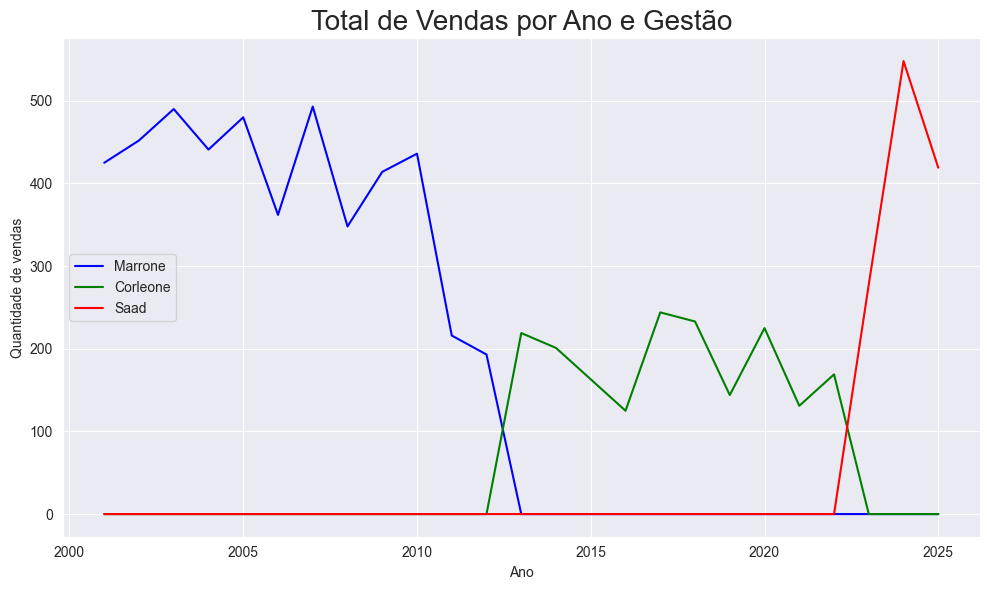

In [27]:
resumo = (
    vendas
    .groupby(["Ano", "Gestão"])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(10,6))

plt.plot(resumo.index, resumo["Marrone"], label="Marrone", color="blue")
plt.plot(resumo.index, resumo["Corleone"], label="Corleone", color="green")
plt.plot(resumo.index, resumo["Saad"], label="Saad", color="red")

plt.title("Total de Vendas por Ano e Gestão", fontsize=20)
plt.xlabel("Ano")
plt.ylabel("Quantidade de vendas")
plt.legend()

plt.tight_layout()
plt.savefig('../graphics/vendas_timeline.png', dpi=300, bbox_inches='tight')
plt.show()

Aqui podemos ver ao longo do tempo como foi mudando o volume de vendas de contratos da empresa. Em 2010 começa a queda de vendas e a mudança da próxima gestão começa em 2012. Dá pra ver um aumento evidente da grande queda mas ela estabiliza em valores muito baixos comparados aos anos anteriores. Em 2022 mais uma vez há uma mudança de gestão e o crescimento de vendas é quase exponencial.

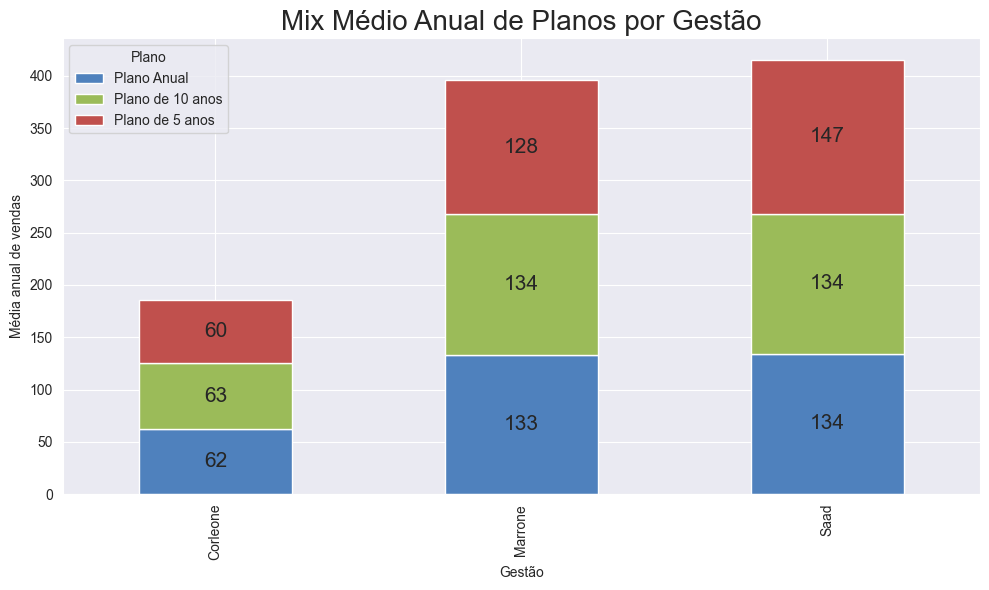

In [28]:
base = (
    vendas
    .groupby(["Gestão", "Ano", "Contrato"])
    .size()
    .reset_index(name="Vendas")
)

media_gestao = (
    base
    .groupby(["Gestão", "Contrato"])["Vendas"]
    .mean()
    .unstack(fill_value=0)
)

ax = media_gestao.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=cores
)

# Colocando os valores escritos nas barras para melhor visualização
for i, gestao in enumerate(media_gestao.index):
    acumulado = 0
    for valor in media_gestao.loc[gestao]:
        if valor > 0:
            ax.text(
                i,
                acumulado + valor/2,
                f"{valor:.0f}",
                ha="center",
                va="center",
                fontsize=15
            )
        acumulado += valor

plt.title("Mix Médio Anual de Planos por Gestão", fontsize=20)
plt.xlabel("Gestão")
plt.ylabel("Média anual de vendas")
plt.legend(title="Plano")

plt.tight_layout()
plt.savefig('../graphics/MAnualxGestao.png', dpi=300, bbox_inches='tight')
plt.show()

Vemos aqui que não há uma grande diferença dos planos vendidos pelas gestões. Até a gestão mais baixa segue uma divisão similar de vendas de planos.

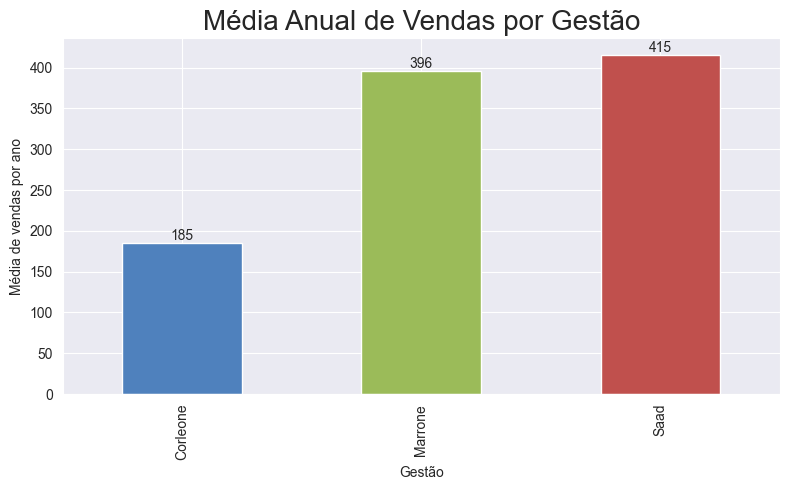

In [30]:
# Vendo a média das vendas no ano

vendas_ano = (
    vendas
    .groupby(["Gestão", "Ano"])
    .size()
    .reset_index(name="Vendas")
)

media_gestao = (
    vendas_ano
    .groupby("Gestão")["Vendas"]
    .mean()
)

media_gestao.plot(
    kind="bar",
    figsize=(8,5),
    color=cores
)

for i, v in enumerate(media_gestao.values):
    plt.text(i, v, f"{v:.0f}", ha="center", va="bottom")

plt.title("Média Anual de Vendas por Gestão", fontsize=20)
plt.xlabel("Gestão")
plt.ylabel("Média de vendas por ano")

plt.tight_layout()
plt.savefig('../graphics/MediaxGestao.png', dpi=300, bbox_inches='tight')
plt.show()

A média das vendas na anualidade mostra uma depressão na segunda gestão e o já crescimento da última em comparação a primeira que era até então maior.

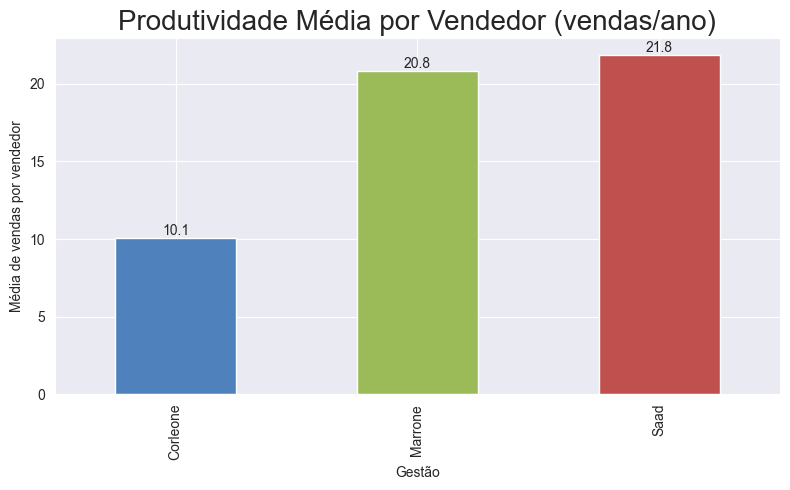

In [32]:
# Calcula vendas médias por vendedor em cada gestão (produtividade)

produtividade = (
    vendas
    .groupby(["Gestão", "Ano", "Vendedor"])
    .size()
    .reset_index(name="Vendas")
)

media_produtividade = (
    produtividade
    .groupby("Gestão")["Vendas"]
    .mean()
)

media_produtividade.plot(
    kind="bar",
    figsize=(8,5),
    color=cores
)

for i, v in enumerate(media_produtividade.values):
    plt.text(i, v, f"{v:.1f}", ha="center", va="bottom")

plt.title("Produtividade Média por Vendedor (vendas/ano)", fontsize=20)
plt.xlabel("Gestão")
plt.ylabel("Média de vendas por vendedor")

plt.tight_layout()
plt.savefig('../graphics/vendador_mediaxgestao.png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2632\2845046566.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


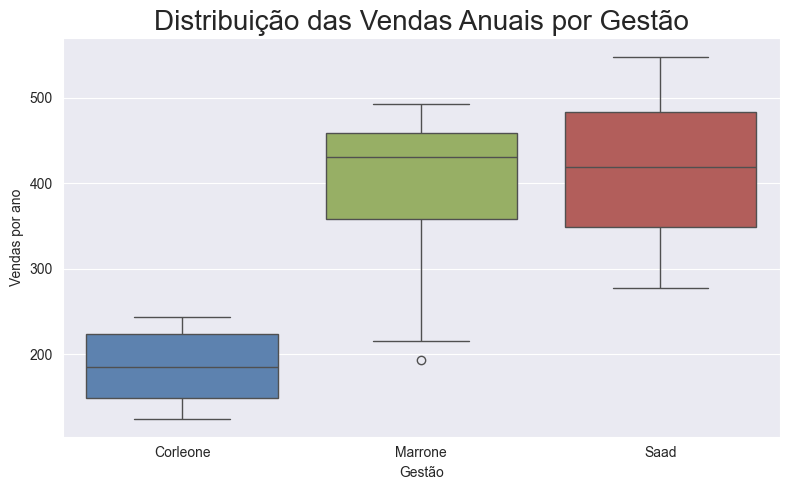

In [22]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=vendas_ano,
    x="Gestão",
    y="Vendas",
    palette=cores
)

plt.title("Distribuição das Vendas Anuais por Gestão", fontsize=20)
plt.xlabel("Gestão")
plt.ylabel("Vendas por ano")

plt.tight_layout()
plt.show()

Aqui vemos que por mais que os valores das gestões 1 e 3 sejam similares, vemos alguns outliers bem baixos da gestão 1, enquanto o 3 parece mais estável em seus valores.

In [11]:
crescimento_corleone = (
    (media_gestao["Corleone"] - media_gestao["Marrone"]) /
    media_gestao["Marrone"] * 100
)

crescimento_saad = (
    (media_gestao["Saad"] - media_gestao["Corleone"]) /
    media_gestao["Corleone"] * 100
)

crescimento_saadxmarrone = (
        (media_gestao["Saad"] - media_gestao["Marrone"]) /
        media_gestao["Marrone"] * 100
)

print(f"Corleone vs Marrone: {crescimento_corleone:.1f}%")
print(f"Saad vs Corleone: {crescimento_saad:.1f}%")
print(f"Saad vs Marrone: {crescimento_saadxmarrone:.1f}%")

Corleone vs Marrone: -53.2%
Saad vs Corleone: 123.8%
Saad vs Marrone: 4.8%


# Conclusão

Podemos concluir que a última gestão recupera uma época de ouro do AlphaClub, recuperando a maior fonte de renda da sua empresa que é a venda de títulos. Não só isso, se vemos que a primeira gestão era onde o clube teve seu maior indice de ganhos, vemos já nesses primeiros anos a última gestão crescendo 5% sobre a "maior" gestão.

É claro que essa comparação é sobre as médias, e as médias dos últimos anos está dentro de uma crescente contínua, esse valor pode mudar com o passar dos anos. Mas a resposta a pergunta inicial é: **Sim**, há impacto na troca de gestão. Elas sempre apresentaram crescimento após uma depressão crescente.